# **Problem Statement:**  

The two-wheeler market is dominated by affordable, low-power petrol bikes, but their inefficiency (low mileage) and steep depreciation raise concerns about long-term cost and sustainability. Meanwhile, EVs—despite superior mileage and value retention—remain a minority (23.6%), likely due to higher upfront costs or consumer hesitation. This analysis identifies key gaps:  

1. **Consumer Preference vs. Efficiency**: Petrol bikes (76.4% share) lag in mileage, yet EVs struggle to gain traction despite clear efficiency advantages.  
2. **Performance Trade-Offs**: High-CC/BHP bikes cater to premium buyers but sacrifice fuel economy and resale value.  
3. **Market Imbalance**: Data reveals untapped potential for EVs, but barriers (price, awareness, infrastructure) may hinder adoption.  

**Objective**: Uncover actionable insights to bridge the gap between consumer demand (affordability) and sustainable performance (EV efficiency).

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data.
df = pd.read_csv("Bikes_Data.csv")

In [4]:
# Checking the dimensionality of the data.
df.shape

(413, 9)

In [5]:
# Checking Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       413 non-null    object 
 1   Model_Name  413 non-null    object 
 2   CC          413 non-null    float64
 3   BHP         306 non-null    float64
 4   Mileage     276 non-null    float64
 5   Price       413 non-null    object 
 6   Type        413 non-null    object 
 7   Weight      385 non-null    float64
 8   Ratings     392 non-null    float64
dtypes: float64(5), object(4)
memory usage: 29.2+ KB


In [6]:
# Basic Statistics
df.describe()

,CC,BHP,Mileage,Weight,Ratings
count,413.000000,306.000000,276.000000,385.000000,392.000000
mean,400.130363,55.263333,67.253623,165.038701,4.417857
std,457.593703,53.598273,46.795386,59.396297,0.573175
min,0.000000,4.300000,14.500000,45.000000,1.000000
25%,97.200000,14.637500,34.000000,115.000000,4.300000
50%,225.900000,32.100000,48.000000,163.500000,4.600000
75%,649.000000,81.800000,90.000000,199.000000,4.800000
max,2458.000000,215.000000,316.000000,427.000000,5.000000


In [7]:
# Checking for duplicated values.
df.duplicated().sum()

0

In [8]:
# Checking the Missing Values percentage.
df.isnull().sum()/len(df)*100

Brand          0.000000
Model_Name     0.000000
CC             0.000000
BHP           25.907990
Mileage       33.171913
Price          0.000000
Type           0.000000
Weight         6.779661
Ratings        5.084746
dtype: float64

## **Data Cleaning:**

In [10]:
# Remove ₹, commas, question marks, and any leading/trailing whitespace
df["Price"] = df["Price"].str.replace("₹", "", regex=False)
df["Price"] = df["Price"].str.replace(",", "", regex=False)
df["Price"] = df["Price"].str.replace("?", "", regex=False)
df["Price"] = df["Price"].str.strip()

# Optional: Remove rows where Price is still not numeric
df = df[df["Price"].str.replace(".", "", regex=False).str.isnumeric()]

# Convert to float
df["Price"] = df["Price"].astype(float)

In [11]:
# Filling the Missing Values.
petrol_df = df[df['Type'] == 'Petrol']
ev_df = df[df["Type"]== "EV"]

# Impute bhp
# Missing BHP values for petrol bikes are filled with the brand-wise median.

df.loc[df['Type'] == 'Petrol', 'BHP'] = petrol_df.groupby('Brand')['BHP'].transform(lambda x: x.fillna(x.median()))

# as ev bikes dont have BHP they are filled with 0.
df["BHP"] = df["BHP"].fillna(0)

In [12]:
# Impute mileage
# Mileage values are filled with the brand-wise median, separately for Petrol and EV bikes based on their type.

df.loc[df['Type'] == 'Petrol', 'Mileage'] = petrol_df.groupby('Brand')['Mileage'].transform(lambda x: x.fillna(x.median()))
df.loc[df['Type'] == 'EV', 'Mileage'] = ev_df.groupby('Brand')['Mileage'].transform(lambda x: x.fillna(x.median()))
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median())

In [13]:
# Missing values in the Weight column are filled with the median weight based on each bike's Type(e.g., Petrol, EV).

df['Weight'] = df.groupby('Type')['Weight'].transform(lambda x: x.fillna(x.median()))

In [14]:
# Missing values in the Ratings column are filled with the median Ratings based on each bike's Type(e.g., Petrol, EV).

df["Ratings"] = df.groupby('Type')["Ratings"].transform(lambda x: x.fillna(x.median()))

In [15]:
# Re-Checking missing values.
df.isnull().sum()/len(df)*100

Brand         0.0
Model_Name    0.0
CC            0.0
BHP           0.0
Mileage       0.0
Price         0.0
Type          0.0
Weight        0.0
Ratings       0.0
dtype: float64

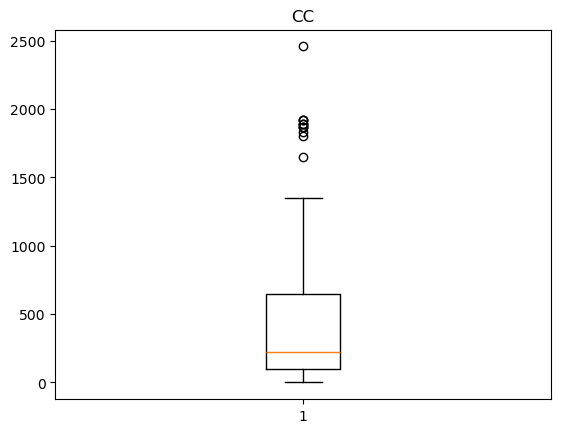

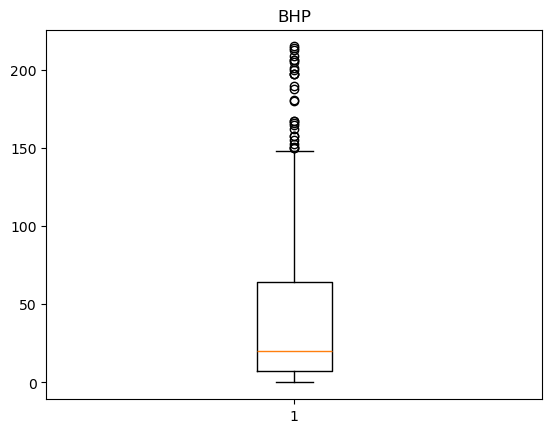

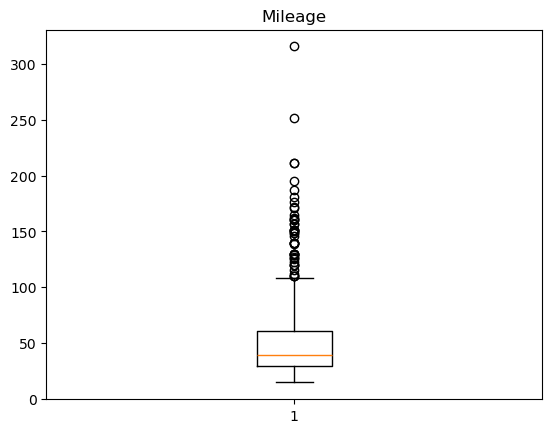

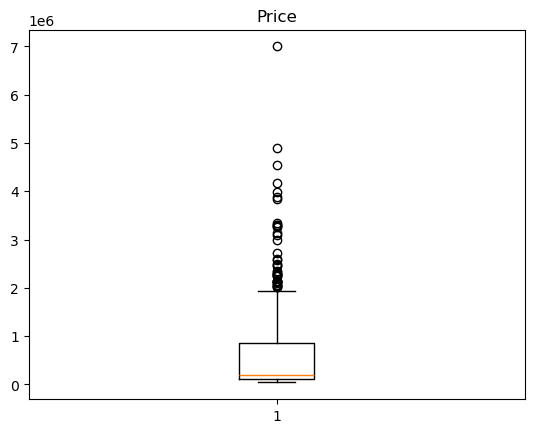

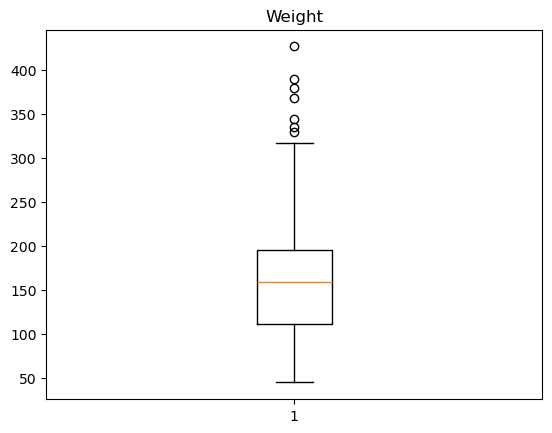

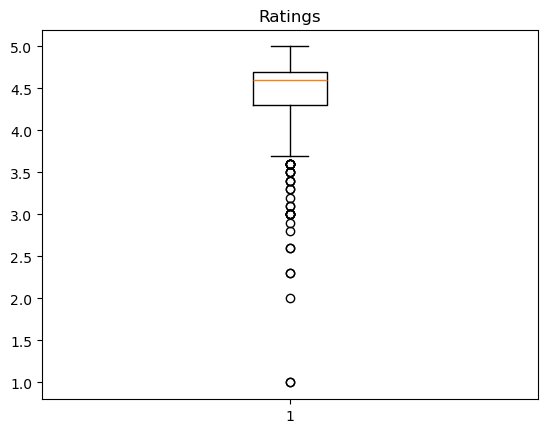

In [16]:
for i in df.select_dtypes("number"):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

## **Data Analysis:**

### **Univariate Analysis :**

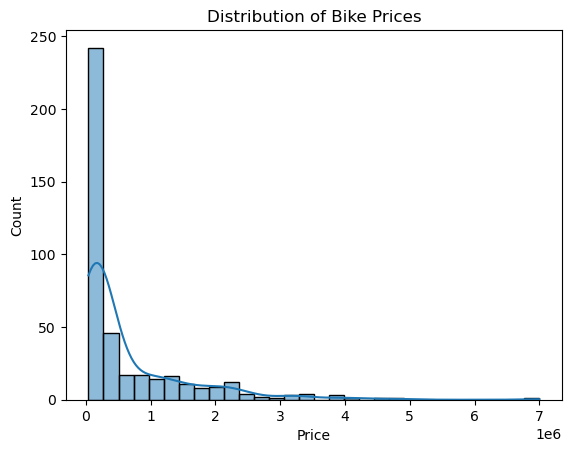

In [19]:
sns.histplot(df,x = "Price",kde = True,bins = 30)
plt.title("Distribution of Bike Prices")
plt.show()

***Insights :***
1. Most bikes are priced below ₹10 lakh, showing high demand for affordable models.
2. The distribution is right-skewed, with very few expensive bikes.
3. Outliers above ₹50–60 lakhs suggest the presence of premium or luxury models.

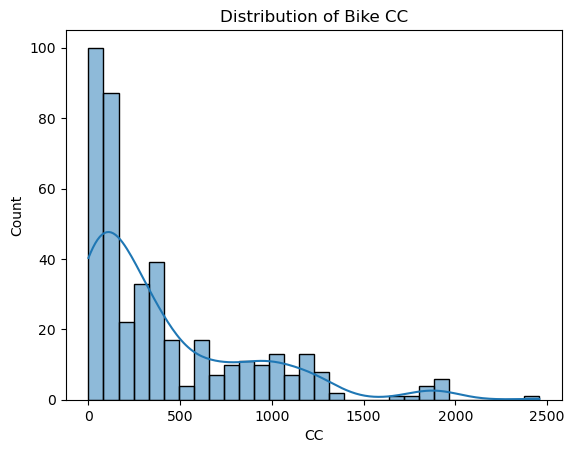

In [21]:
sns.histplot(df,x = "CC",kde = True,bins = 30)
plt.title("Distribution of Bike CC")
plt.show()

***Insights :***
1. Most bikes have engine capacities below 200 CC, showing high demand for commuter bikes.
2. Very few bikes have engines above 1000 CC, indicating these are premium models.
3. The distribution is right-skewed, meaning smaller engines are far more common than larger ones.

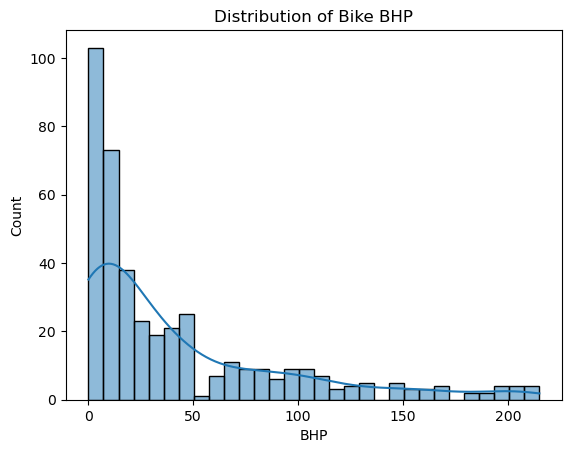

In [23]:
sns.histplot(df,x = "BHP",kde = True,bins = 30)
plt.title("Distribution of Bike BHP")
plt.show()

***Insights :***
1. Most bikes have BHP below 20, indicating they are regular commuter bikes.
2. Very few bikes exceed 100 BHP, showing limited presence of high-performance bikes.
3. The distribution is right-skewed, with power concentrated in lower BHP ranges.

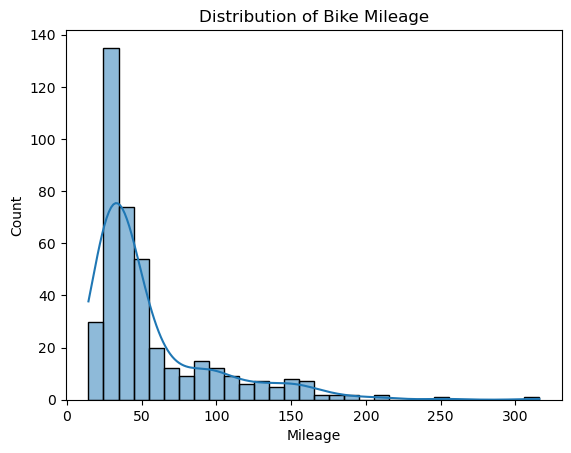

In [25]:
sns.histplot(df,x = "Mileage",kde = True,bins = 30)
plt.title("Distribution of Bike Mileage")
plt.show()

***Insights :***
1. Most vehicles have low mileage (under 150).  
2. The distribution is right-skewed with a long tail.  
3. A few high-mileage bikes exist (over 200) which are EV bikes.

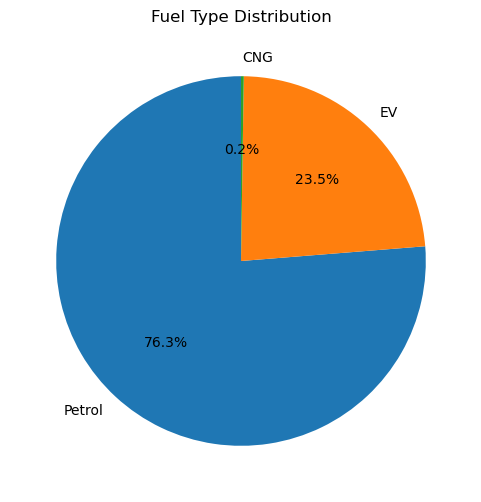

In [27]:
plt.figure(figsize=(6, 6))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Fuel Type Distribution")
plt.ylabel("")
plt.show()

***Insights :***
1. Petrol vehicles dominate (76.4%) the dataset.  
2. EVs make up a smaller share (23.6%).  
3. The distribution shows a clear preference for petrol over electric.

### **Bivariate Analysis :**

In [30]:
df_ev = df[df["Type"] == "EV"]
df_petrol = df[df['Type'] == "Petrol"]

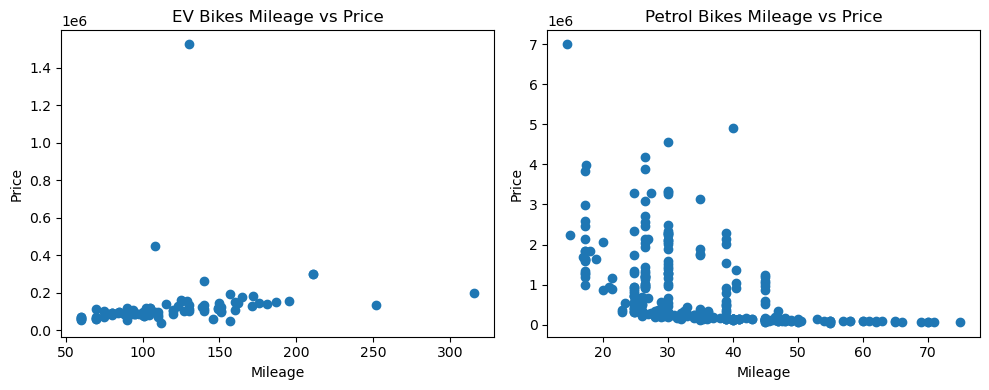

In [78]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
plt.scatter(df_ev["Mileage"],df_ev["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("EV Bikes Mileage vs Price")
plt.subplot(1,2,2)
plt.scatter(df_petrol["Mileage"],df_petrol["Price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Petrol Bikes Mileage vs Price")
plt.tight_layout()
plt.show()

***Insights :***
1. **EV Bikes**: Higher mileage (up to 300kmpc) correlates with lower prices (under 1.4), suggesting depreciation with use.  
2. **Petrol Bikes**: Prices (up to 70lakhs) are higher overall but drop sharply with mileage (under 70kmpl), indicating steeper depreciation.  
3. **Comparison**: EVs retain value better over long distances, while petrol bikes lose value faster despite lower mileage ranges.

Text(0.5, 1.0, 'CC vs Price plot')

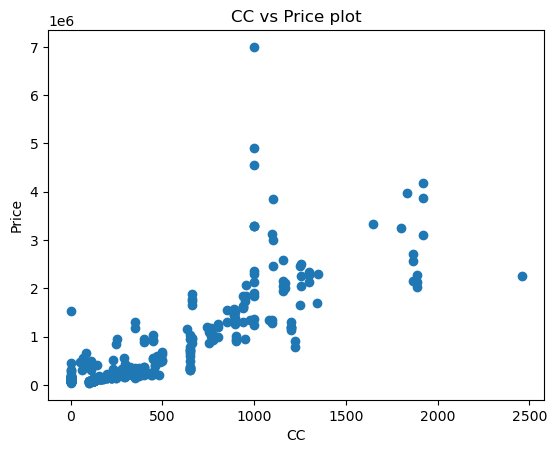

In [33]:
plt.scatter(df["CC"],df["Price"])
plt.xlabel("CC")
plt.ylabel("Price")
plt.title("CC vs Price plot")

***Insights :***
1. **Engine Size Impact**: Higher CC (engine size) generally correlates with higher bike prices, but the trend isn't strictly linear.  
2. **Price Range**: Most bikes cluster below 1500 CC, with prices varying widely (10–70lakhs), suggesting other factors influence cost.  
3. **Outliers**: A few high-CC bikes (near 2500) deviate, possibly luxury or performance models with premium pricing.

Text(0.5, 1.0, 'BHP vs Price Plot')

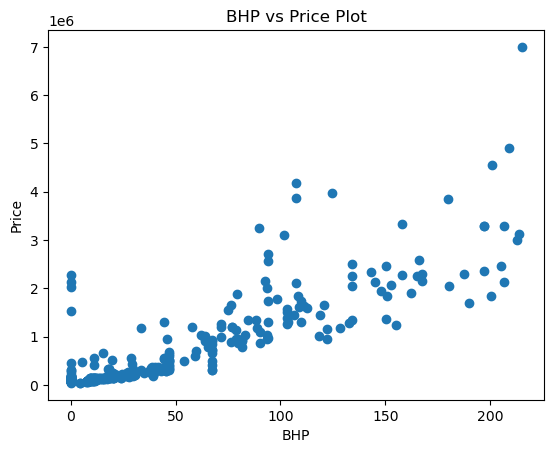

In [69]:
plt.scatter(df["BHP"],df["Price"])
plt.xlabel("BHP")
plt.ylabel("Price")
plt.title("BHP vs Price Plot")

***Insights :***
1. **Power vs. Price**: Higher BHP (horsepower) generally corresponds to higher bike prices, indicating performance impacts cost.  
2. **Value Clusters**: Most bikes concentrate in mid-range BHP (e.g., 20–120), balancing performance and affordability.

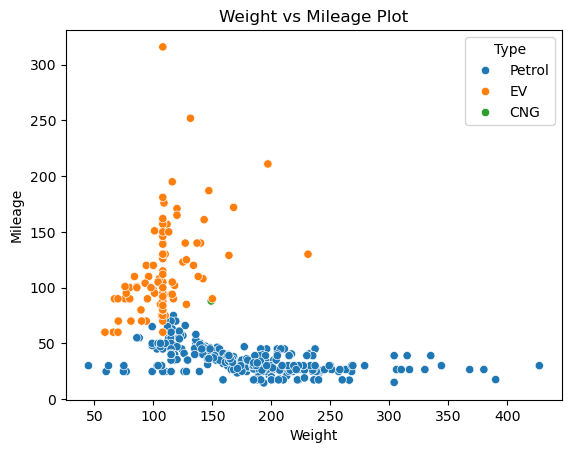

In [84]:
sns.scatterplot(df, x = "Weight",y = "Mileage",hue = "Type")
plt.xlabel("Weight")
plt.ylabel("Mileage")
plt.title("Weight vs Mileage Plot")
plt.show()

***Insights :***
1. **EV Advantage**: EVs achieve higher mileage (up to 300) even at heavier weights, highlighting efficiency.  
2. **Petrol Limitation**: Petrol bikes show lower mileage (under 80) as weight increases, reflecting fuel inefficiency.  
3. **Weight Impact**: Heavier bikes (over 250) are predominantly petrol, suggesting EVs prioritize lightweight designs for range.

Text(0.5, 1.0, 'CC vs Mileage')

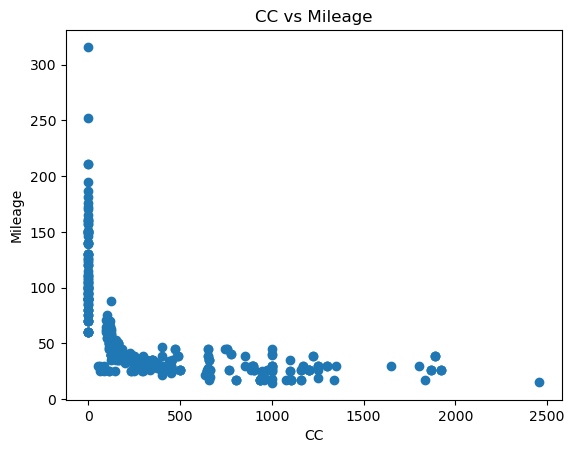

In [41]:
plt.scatter(df["CC"],df["Mileage"])
plt.xlabel("CC")
plt.ylabel("Mileage")
plt.title("CC vs Mileage plot")

***Insights :***
1. **Inverse Relationship**: Higher engine displacement (CC) correlates with lower mileage, indicating larger engines are less fuel-efficient.  
2. **EV Dominance**: The highest mileage (200-300) likely comes from EVs or small-CC bikes, as they’re unaffected by traditional engine inefficiency.  
3. **Petrol Range**: Most petrol bikes (500-2000 CC) cluster below 100 mileage, with larger engines (2500+ CC) showing the poorest efficiency.

In [87]:
# Top rated EV Bike Brands
df1 = df_ev[df_ev["Ratings"]==5]
df1["Brand"].unique()

array(['BMW', 'Lectrix', 'Okaya', 'Okinawa', 'Quantum-Energy',
       'Ultraviolette'], dtype=object)

In [89]:
# Top rated Petrol Bike Brands
df2 = df_petrol[df_petrol["Ratings"]==5]
df2["Brand"].unique()

array(['Honda', 'Kawasaki', 'KTM', 'Triumph', 'Aprilia', 'Benelli', 'BMW',
       'Ducati', 'Harley-Davidson', 'Indian', 'Keeway', 'Moto-Guzzi'],
      dtype=object)

### **Multivariate Analysis :**

<Axes: >

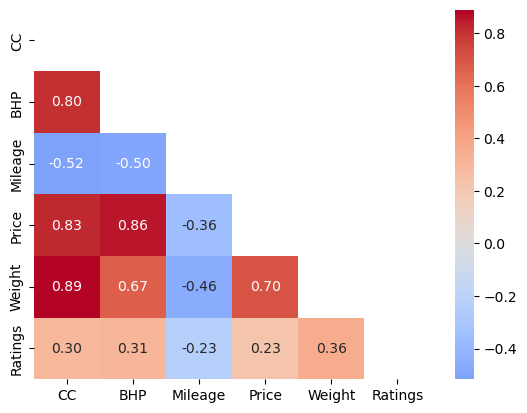

In [44]:
sns.heatmap(df.corr(numeric_only=True), annot=True,fmt=".2f", cmap="coolwarm", 
                center=0, mask=np.triu(df.corr(numeric_only = True)))

---

***Insights :***
1. **Strong Positive Correlations**:  
   - **Price** is highly linked to BHP (0.89) and CC (0.83), confirming performance drives cost.  
   - **Weight** also correlates with Price (0.85) and BHP (0.87), suggesting heavier bikes are premium/high-power.  

2. **Efficiency Trade-offs**:  
   - **Mileage** negatively correlates with CC (-0.80) and BHP (-0.52), highlighting fuel inefficiency in larger engines.  

3. **Unexpected Insights**:  
   - **Rating** shows weak/mixed relationships.

# **Conclusion :**
1. **Market Dominance**: Affordable commuter bikes (under ₹10 lakh, <200 CC, <20 BHP) dominate the market, with petrol models (76.4%) being far more popular than EVs (23.6%).  

2. **Performance vs. Efficiency**: Higher-performance bikes (large CC, high BHP) command premium prices but suffer from lower mileage, while EVs excel in efficiency (higher mileage) and retain value better over time.  

3. **Key Trade-offs**: The data highlights a clear trade-off between power (BHP/CC) and fuel efficiency, with EVs emerging as a cost-effective alternative for high-mileage use despite their current minority market share.

4. **Suggestion**: From the above insights we can conclude that Ev Bikes are cost effective and offer more mileage.  